# Pandas module
- Pandas是Python語言的一個高效簡易的資料處理和分析工具，類似於Excel的程式版本
- 提供資料結構 (Series, DataFrame) 和運算操作，因此可以用Python來操作試算表內的資料。


![pandas dataframe and series](https://www.altexsoft.com/static/blog-post/2024/2/a2b6d6bd-898e-424f-98a8-50b3bdf775eb.webp)

# Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib.font_manager import fontManager

# 建立Series

- Series 是一個一維的資料結構, 只有一個索引
- pd.Series(資料 [, index = 索引])
  - 資料可用 List, Dict, Tuple, Numpy
  - 索引可選填，預設為整數List

In [2]:
#用串列建立Series物件
foo = ['a', 'c', 'x', 'y']
my_ser = pd.Series(foo)
print(my_ser)           #顯示Series
print(my_ser.values)    #顯示值
print(my_ser.index)     #顯示索引

0    a
1    c
2    x
3    y
dtype: object
['a' 'c' 'x' 'y']
RangeIndex(start=0, stop=4, step=1)


In [3]:
#用串列建立Series物件並自訂索引
company = ['聯電', '台積電', '聯發科']
stock_price = [42, 510, 694]
stock = pd.Series(stock_price, index=company)
print(stock)
print(stock.values)
print(stock.index)

聯電      42
台積電    510
聯發科    694
dtype: int64
[ 42 510 694]
Index(['聯電', '台積電', '聯發科'], dtype='object')


In [4]:
# 用Dict建立Series
dict1 = {'Taiwan': '台北', 'US': 'New York', 'Japan': 'Tokyo'}
city = pd.Series(dict1)
print(city)

Taiwan          台北
US        New York
Japan        Tokyo
dtype: object


# 讀取Series

In [5]:
print(city['Taiwan']) # get data by key
print(city.iloc[0])        # get data by index
print(city.index[0])  # get key by index

台北
台北
Taiwan


# Lab series

(1) 根據下列表格資料，創建一個 Series (city_revenues), 回答下列問題
city | revenues
-----|---------
Amsterdam|4200
Toronto|8000
Tokyo|6500

- Toronto 的 revenues 是多少
- 第零筆資料的 revenues 是多少
- 最後一筆資料的 revenues 是多少
- 求 revenues 的 sum

(2) 根據下列表格資料，創建一個 Series (city_employee_count),回答下列問題
city | employee_count
-----|----------------
Amsterdam|5
Tokyo|8

Tokyo 是否在 city_employee_count 中

(3) 合併 city_revenues 和 city_employee_count 來產生一個 DataFrame (city_data), 回答下列問題
- 查詢 Amsterdam 的列資料
- 查詢第零橫列的列資料
- 查詢 Amsterdam 到 Tokyo的 revenue 資料



In [4]:
import pandas as pd

city_revenues = pd.Series([4200, 8000, 6500], \
                          index=['Amsterdam', 'Toronto', 'Tokyo'])
print(city_revenues['Toronto'])
print(city_revenues.iloc[0])
print(city_revenues.iloc[-1])
print(city_revenues.sum())

city_employee_count = pd.Series([5, 8], index=['Amsterdam', 'Tokyo'])
print('Tokyo' in city_employee_count.index)

city_data = pd.DataFrame({'revenues': city_revenues,
                           'employee_count':city_employee_count})
city_data.loc['Amsterdam']
city_data.iloc[0]
city_data.loc['Amsterdam':'Tokyo']

8000
4200
6500
18700
True


,revenues,employee_count
Amsterdam,4200,5.0
Tokyo,6500,8.0


# 建立DataFrame

- DataFrame 是一個二維的資料結構, 有橫列索引 (row index) 和直欄標籤 (column label)
- DataFrame 中的每一個直行可以被視為一個 Series
- pd.DataFrame(資料 [, index = 橫列索引, columns = 直欄標籤])
- 資料可用 List, Dict, Numpy, Tuple, Series.
- 橫列索引是列號，可選填，預設為整數List
- 直欄標籤是欄位名稱

### 用List建立DataFrame

In [5]:
foo=  [[65,92,78,83,70],
       [90,72,76,93,56],
       [81,85,91,89,77],
       [79,53,47,94,80],
       ]
df = pd.DataFrame(foo)
print(df)
print(df.values)
print(df.index)
# 缺row index 跟column label

    0   1   2   3   4
0  65  92  78  83  70
1  90  72  76  93  56
2  81  85  91  89  77
3  79  53  47  94  80
[[65 92 78 83 70]
 [90 72 76 93 56]
 [81 85 91 89 77]
 [79 53 47 94 80]]
RangeIndex(start=0, stop=4, step=1)


In [8]:
# 設定row index 跟column label
df = pd.DataFrame(foo,
                   index=['王小明','李小美','陳大同','林小玉'],
                   columns=['國文','英文','數學','自然','社會'])
df

,國文,英文,數學,自然,社會
王小明,65,92,78,83,70
李小美,90,72,76,93,56
陳大同,81,85,91,89,77
林小玉,79,53,47,94,80


### 用Dict建立DataFrame

In [ ]:
# 以column為基礎的dict
scores = {'國文':{'王小明':65,'李小美':90,'陳大同':81,'林小玉':79},
          '英文':{'王小明':92,'李小美':72,'陳大同':85,'林小玉':53},
          '數學':{'王小明':78,'李小美':76,'陳大同':91,'林小玉':47},
          '自然':{'王小明':83,'李小美':93,'陳大同':89,'林小玉':94},
          '社會':{'王小明':70,'李小美':56,'陳大同':77,'林小玉':80}}
pd.DataFrame(scores)

## 用Array建立DataFrame

In [ ]:
mydata = np.random.randn(4, 3)
print(mydata)
df = pd.DataFrame(mydata, columns=list("ABC"), index=list("甲乙丙丁"))
df

## 了解DataFrame的結構

In [ ]:
print(df.shape)
print(df.dtypes)
print(df.info)
print(df.describe())
df

,國文,英文,數學,自然,社會
王小明,65,92,78,83,70
李小美,90,72,76,93,56
陳大同,81,85,91,89,77
林小玉,79,53,47,94,80


## 合併兩個DataFrame

In [ ]:
scores = {'國文':{'王小明':65,'李小美':90,'陳大同':81,'林小玉':79},
          '英文':{'王小明':92,'李小美':72,'陳大同':85,'林小玉':53},
          '數學':{'王小明':78,'李小美':76,'陳大同':91,'林小玉':47},
          '自然':{'王小明':83,'李小美':93,'陳大同':89,'林小玉':94},
          '社會':{'王小明':70,'李小美':56,'陳大同':77,'林小玉':80}}
df1 = pd.DataFrame(scores)
scores_others = {'體育':{'王小明':90,'李小美':93,'陳大同':95,'林小玉':80},
          '家政':{'王小明':70,'李小美':80,'陳大同':75,'林小玉':90},}

df2 = pd.DataFrame(scores_others)
df_all = pd.concat([df1, df2], axis=1)
df_all

In [ ]:
mydata = np.random.randn(4, 3)
df1 = pd.DataFrame(mydata, columns=list("ABC"))
df1

In [ ]:
df2 = pd.DataFrame(np.random.randn(3, 3), columns=list("ABC"))
df2

In [ ]:
#上下合併沒什麼問題
df3 = pd.concat([df1, df2], axis=0)
df3

In [ ]:
#把 index 重新整理
df3.index = range(7)
df3

In [ ]:
# 左右合併還是可以，不過因為形狀不同，所以會出現NaN。
df4 = pd.concat([df1, df2], axis=1)
df4

# 讀取DataFrame資料

## 以欄位取值 df[column]

In [13]:
scores = {'國文':{'王小明':65,'李小美':90,'陳大同':81,'林小玉':79},
          '英文':{'王小明':92,'李小美':72,'陳大同':85,'林小玉':53},
          '數學':{'王小明':78,'李小美':76,'陳大同':91,'林小玉':47},
          '自然':{'王小明':83,'李小美':93,'陳大同':89,'林小玉':94},
          '社會':{'王小明':70,'李小美':56,'陳大同':77,'林小玉':80}}
df = pd.DataFrame(scores)
df

,國文,英文,數學,自然,社會
王小明,65,92,78,83,70
李小美,90,72,76,93,56
陳大同,81,85,91,89,77
林小玉,79,53,47,94,80


In [15]:
#讀一個欄位
print(df["自然"])
print(type(df["自然"]))
# print(df["自然"].dtype)

王小明    83
李小美    93
陳大同    89
林小玉    94
Name: 自然, dtype: int64
<class 'pandas.core.series.Series'>


In [ ]:
#讀多個欄位
# df[['國文','英文','數學']] #dataframe
# df['國文']                 #series
# df[['國文']]            #dataframe
# df['王小明'] #error, 因為沒有王小明這個欄位, 雖然有有王小明這個index, 但df['xxx']，拿的是column，所以會error

## 以index label及column name取值：df.loc()

In [26]:
scores = {'國文':{'王小明':65,'李小美':90,'陳大同':81,'林小玉':79},
          '英文':{'王小明':92,'李小美':72,'陳大同':85,'林小玉':53},
          '數學':{'王小明':78,'李小美':76,'陳大同':91,'林小玉':47},
          '自然':{'王小明':83,'李小美':93,'陳大同':89,'林小玉':94},
          '社會':{'王小明':70,'李小美':56,'陳大同':77,'林小玉':80}}
df = pd.DataFrame(scores)
df

,國文,英文,數學,自然,社會
王小明,65,92,78,83,70
李小美,90,72,76,93,56
陳大同,81,85,91,89,77
林小玉,79,53,47,94,80


In [27]:
print(df.loc["林小玉", "社會"]) # int
print(type(df.loc["林小玉", "社會"]))

80
<class 'numpy.int64'>


In [28]:
print(df.loc["王小明", ["國文","社會"]]) # Series
print(type(df.loc["王小明", ["國文","社會"]]))

國文    65
社會    70
Name: 王小明, dtype: int64
<class 'pandas.core.series.Series'>


In [29]:
df.loc[["王小明", "李小美"], ["數學", "自然"]] # DataFrame

,數學,自然
王小明,78,83
李小美,76,93


In [30]:
df.loc["王小明":"陳大同", "數學":"社會"] # DataFrame

,數學,自然,社會
王小明,78,83,70
李小美,76,93,56
陳大同,91,89,77


In [32]:
df.loc["陳大同", :] # Series

國文    81
英文    85
數學    91
自然    89
社會    77
Name: 陳大同, dtype: int64

In [33]:
df.loc[:"李小美", "數學":"社會"] # DataFrame

,數學,自然,社會
王小明,78,83,70
李小美,76,93,56


In [34]:
df.loc["李小美":, "數學":"社會"]

,數學,自然,社會
李小美,76,93,56
陳大同,91,89,77
林小玉,47,94,80


## 以index ID及column ID取值：df.iloc()

In [ ]:
df

In [35]:
df.iloc[3, 4]

np.int64(80)

In [ ]:
df.iloc[0, [0, 4]]
#type(df.iloc[0, [0, 4]])

In [ ]:
df.iloc[[0, 1], [2, 3]]
#type(df.iloc[[0, 1], [2, 3]])

In [ ]:
df.iloc[0:3, 2:5]

In [ ]:
df.iloc[2, :]

In [ ]:
df.iloc[:2, 2:5]

In [ ]:
df.iloc[1:, 2:5]

## 最前或最後幾列資料

In [37]:
df.head(3)

,國文,英文,數學,自然,社會
王小明,65,92,78,83,70
李小美,90,72,76,93,56
陳大同,81,85,91,89,77


In [38]:
df.tail(2)

,國文,英文,數學,自然,社會
陳大同,81,85,91,89,77
林小玉,79,53,47,94,80


## 資料排序

In [40]:
df
df.sort_values(by="國文", ascending=False, inplace=True)
df

,國文,英文,數學,自然,社會
李小美,90,72,76,93,56
陳大同,81,85,91,89,77
林小玉,79,53,47,94,80
王小明,65,92,78,83,70


## 條件取值

In [41]:
df

,國文,英文,數學,自然,社會
李小美,90,72,76,93,56
陳大同,81,85,91,89,77
林小玉,79,53,47,94,80
王小明,65,92,78,83,70


df["數學"]<60 ===> [False, False, False, True] ==> df([False, False, False, True])

In [ ]:
#指定欄位以條件式判斷取值
# df["數學"] < 60
# df[df["數學"] < 60]
#boolean indexing: Using boolean array (series) to index select rows
# c1 = pd.Series([False, True, True, False])
# c1 = df[[False, True, True, False]]  #不取row0&3, 取row1&2, dataframe
df[(df["國文"] >= 80) & (df["國文"] < 90)]
# c2 = df['國文'] >= 80                 #series
# c3 = df[df['國文'] >= 80]            # dataframe

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

## 以values取值

In [ ]:
d1 = df.values              #Numpy ndarray
d1

# 修改DataFrame資料

In [72]:
scores = {'國文':{'王小明':65,'李小美':90,'陳大同':81,'林小玉':79},
          '英文':{'王小明':92,'李小美':72,'陳大同':85,'林小玉':53},
          '數學':{'王小明':78,'李小美':76,'陳大同':91,'林小玉':47},
          '自然':{'王小明':83,'李小美':93,'陳大同':89,'林小玉':94},
          '社會':{'王小明':70,'李小美':56,'陳大同':77,'林小玉':80}}
df = pd.DataFrame(scores)

In [ ]:
dfcopy=df.copy()  # 複製原始資料

In [ ]:
df.loc["王小明", "數學"] = 96  # 修改資料
df

,國文,英文,數學,自然,社會
李小美,90,72,76,93,56
陳大同,81,85,91,89,77
林小玉,79,53,47,94,80
王小明,65,92,96,83,70


In [51]:
df.loc["王小明", :] = 80  # 修改資料
df

,國文,英文,數學,自然,社會
李小美,90,72,76,93,56
陳大同,81,85,91,89,77
林小玉,79,53,47,94,80
王小明,80,80,80,80,80


In [54]:
df

,國文,英文,數學,自然,社會
李小美,90,72,76,93,56
陳大同,81,85,91,89,77
林小玉,79,53,47,94,80
王小明,80,80,80,80,80


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 李小美 to 王小明
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   國文      4 non-null      int64
 1   英文      4 non-null      int64
 2   數學      4 non-null      int64
 3   自然      4 non-null      int64
 4   社會      4 non-null      int64
dtypes: int64(5)
memory usage: 364.0+ bytes


In [56]:
import numpy as np
df["國文"] = df["國文"].astype(np.int8)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 李小美 to 王小明
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   國文      4 non-null      int8 
 1   英文      4 non-null      int64
 2   數學      4 non-null      int64
 3   自然      4 non-null      int64
 4   社會      4 non-null      int64
dtypes: int64(4), int8(1)
memory usage: 336.0+ bytes


In [57]:
df.rename(columns = {"英文":"外語"}, inplace=True)
df

,國文,外語,數學,自然,社會
李小美,90,72,76,93,56
陳大同,81,85,91,89,77
林小玉,79,53,47,94,80
王小明,80,80,80,80,80


In [66]:
df["總分"] = df["國文"] + df["外語"] + df["數學"] + df["自然"] + df["社會"]
df

TypeError: 'method' object is not subscriptable

In [ ]:
df=dfcopy #還原 DataFrame 資料
df

# 新增DataFrame資料

In [76]:
print(df)
# 資料新增
# 確保 df 是 DataFrame，如果不確定，請先執行 df = pd.DataFrame(scores)
df.loc['陳彼得'] = [30, 35, 40, 45, 50]    # 就地更改
df
# print(df)
# # new_row = pd.DataFrame({'國文':{'張阿華':30},
#                          '英文':{'張阿華':35},
#                          '數學':{'張阿華':40},
#                          '自然':{'張阿華':45},
#                          '社會':{'張阿華':50},
#                          '體育':{'張阿華':70},
#                          })
# df1 = pd.concat([df, new_row], ignore_index=False) # True代表放棄原來的index, 變成整數的index
# print(df1)

     國文  英文  數學  自然  社會
王小明  65  92  78  83  70
李小美  90  72  76  93  56
陳大同  81  85  91  89  77
林小玉  79  53  47  94  80
陳彼得  30  35  40  45  50


,國文,英文,數學,自然,社會
王小明,65,92,78,83,70
李小美,90,72,76,93,56
陳大同,81,85,91,89,77
林小玉,79,53,47,94,80
陳彼得,30,35,40,45,50


# 刪除 DataFrame 資料

In [68]:
df

,國文,英文,數學,自然,社會
王小明,65,92,78,83,70
李小美,90,72,76,93,56
陳大同,81,85,91,89,77
林小玉,79,53,47,94,80


In [70]:
dfcopy=df.copy()  # 複製原始資料
df.drop("王小明", axis = 0)          #CRUD Create, Read, Update, Delete

,國文,英文,數學,自然,社會
李小美,90,72,76,93,56
陳大同,81,85,91,89,77
林小玉,79,53,47,94,80


In [71]:
df = dfcopy
df.drop("數學", axis=1)

,國文,英文,自然,社會
王小明,65,92,83,70
李小美,90,72,93,56
陳大同,81,85,89,77
林小玉,79,53,94,80


In [ ]:
dfcopy=df.copy()
dfcopy.drop(["數學", "自然"], axis=1)

In [ ]:
df = dfcopy
df.drop(df.index[1:4])

In [ ]:
dfcopy=df.copy()
dfcopy.drop(dfcopy.columns[1:4], axis=1)

# 讀寫外部檔案

In [ ]:
df

In [ ]:
# 寫到CSV檔案
from pathlib import Path
target_csv_path = Path.cwd() / '..' / 'files' / 'csv' / 'scores.csv'
df.to_csv(target_csv_path, encoding='utf-8-sig')

In [85]:
# 讀CSV檔案
from pathlib import Path
source_csv_path = Path.cwd() / '..' / 'files' / 'csv' / 'covid19.csv'
df = pd.read_csv(source_csv_path)
df.head()

,country_ch,country_en,cases,deaths
0,美國,United States,"76,407,539","923,087"
1,印度,India,"42,272,014","502,874"
2,巴西,Brazil,"26,599,593","632,621"
3,法國,France,"20,804,372","132,923"
4,英國,United Kingdom,"17,866,632","158,363"


In [ ]:
# 讀JSON檔案
from pathlib import Path
source_csv_path = Path.cwd() / '..' / 'files' / 'json' / 'covid19.json'
df = pd.read_json(source_csv_path)
df

In [ ]:
# 讀Excel試算表
from pathlib import Path
source_csv_path = Path.cwd() / '..' / 'files' / 'xls' / 'covid19.xlsx'
df = pd.read_excel(source_csv_path)
df

# 資料清洗 (Customer.csv)

## 查詢空值：isnull()


In [86]:
import pandas as pd
from pathlib import Path

source_csv_path = Path.cwd() / '..' / 'files' / 'csv' / 'customer.csv'
# 讀取資料
df = pd.read_csv(source_csv_path)
df

,id,name,gender,age,area,job
0,1700001,李國發,Male,21.0,新北市三重區,金融業 和房地產
1,1700002,吳俊諺,NaN,NaN,臺北市文山區,金融業和房地產
2,1700003,蔡俊毅,NaN,NaN,臺北市文山區,教育體育 文化
3,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿 和 餐飲業
4,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿和餐飲業
5,1700005,袁劭彥,Male,42.0,臺北市文山區,金融業和房地產
6,1700006,蔡登意,NaN,NaN,NaN,金融業和房地產
7,1700007,吳景翔,NaN,39.0,NaN,農林牧漁業
8,1700008,邱孝信,NaN,39.0,NaN,金融業和房地產
9,1700009,陳明輝,NaN,57.0,基隆市中正區,金融業和房地產


In [ ]:
# 空值的處理
print('各個欄位有空值的狀況:')
# print(df.isnull())
# print(df.isnull().sum())
# print(df.isnull().any(axis=1))
# print('有空值的記錄筆數:', df.isnull().any(axis=1).sum())
# print(df.isnull().any(axis=0))
# print('有空值的欄位數:', df.isnull().any(axis=0).sum())
# print('age欄有空值的記錄:')
# print(df[df['age'].isnull()])

各個欄位有空值的狀況:
age欄有空值的記錄:
        id name gender  age    area       job
1  1700002  吳俊諺    NaN  NaN  臺北市文山區   金融業和房地產
2  1700003  蔡俊毅    NaN  NaN  臺北市文山區  教育體育  文化
6  1700006  蔡登意    NaN  NaN     NaN   金融業和房地產


## 空欄填值：fillna()

In [ ]:
df

In [97]:
# 將age的空值填入0
df_sample = df.copy()
df_sample['age'] = df_sample['age'].fillna(value=0)
df_sample.head()

,id,name,gender,age,area,job
0,1700001,李國發,Male,21.0,新北市三重區,金融業 和房地產
1,1700002,吳俊諺,NaN,0.0,臺北市文山區,金融業和房地產
2,1700003,蔡俊毅,NaN,0.0,臺北市文山區,教育體育 文化
3,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿 和 餐飲業
4,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿和餐飲業


In [98]:
# 將age的空值填入平均值
df_sample = df.copy()
df_sample['age'] = df_sample['age'].fillna(
                    value=df_sample['age'].mean())
df_sample.head()

,id,name,gender,age,area,job
0,1700001,李國發,Male,21.0,新北市三重區,金融業 和房地產
1,1700002,吳俊諺,NaN,45.0,臺北市文山區,金融業和房地產
2,1700003,蔡俊毅,NaN,45.0,臺北市文山區,教育體育 文化
3,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿 和 餐飲業
4,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿和餐飲業


In [99]:
# 以前一個值往下填ffill或後一個值往上填bfill
df_sample['gender'] = df_sample['gender'].fillna(method='ffill')
df_sample['area'] = df_sample['area'].fillna(method='ffill')
df_sample.head(10)

/var/folders/bg/gh3cf23s4w97s3sbk0rc8jjc0000gn/T/ipykernel_46071/883580443.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sample['gender'] = df_sample['gender'].fillna(method='ffill')
/var/folders/bg/gh3cf23s4w97s3sbk0rc8jjc0000gn/T/ipykernel_46071/883580443.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sample['area'] = df_sample['area'].fillna(method='ffill')


,id,name,gender,age,area,job
0,1700001,李國發,Male,21.0,新北市三重區,金融業 和房地產
1,1700002,吳俊諺,Male,45.0,臺北市文山區,金融業和房地產
2,1700003,蔡俊毅,Male,45.0,臺北市文山區,教育體育 文化
3,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿 和 餐飲業
4,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿和餐飲業
5,1700005,袁劭彥,Male,42.0,臺北市文山區,金融業和房地產
6,1700006,蔡登意,Male,45.0,臺北市文山區,金融業和房地產
7,1700007,吳景翔,Male,39.0,臺北市文山區,農林牧漁業
8,1700008,邱孝信,Male,39.0,臺北市文山區,金融業和房地產
9,1700009,陳明輝,Male,57.0,基隆市中正區,金融業和房地產


In [ ]:
# 刪除不完整的資料
df_sample = df.copy()
df_no_na= df_sample.dropna()
df_no_na

## 去除重複資料

In [100]:
df_sample = df.copy()
df_sample

,id,name,gender,age,area,job
0,1700001,李國發,Male,21.0,新北市三重區,金融業 和房地產
1,1700002,吳俊諺,NaN,NaN,臺北市文山區,金融業和房地產
2,1700003,蔡俊毅,NaN,NaN,臺北市文山區,教育體育 文化
3,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿 和 餐飲業
4,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿和餐飲業
5,1700005,袁劭彥,Male,42.0,臺北市文山區,金融業和房地產
6,1700006,蔡登意,NaN,NaN,NaN,金融業和房地產
7,1700007,吳景翔,NaN,39.0,NaN,農林牧漁業
8,1700008,邱孝信,NaN,39.0,NaN,金融業和房地產
9,1700009,陳明輝,NaN,57.0,基隆市中正區,金融業和房地產


In [101]:
# 去除重複的記錄
df_sample.drop_duplicates(subset='id', keep='first', inplace=True)
df_sample

,id,name,gender,age,area,job
0,1700001,李國發,Male,21.0,新北市三重區,金融業 和房地產
1,1700002,吳俊諺,NaN,NaN,臺北市文山區,金融業和房地產
2,1700003,蔡俊毅,NaN,NaN,臺北市文山區,教育體育 文化
3,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿 和 餐飲業
5,1700005,袁劭彥,Male,42.0,臺北市文山區,金融業和房地產
6,1700006,蔡登意,NaN,NaN,NaN,金融業和房地產
7,1700007,吳景翔,NaN,39.0,NaN,農林牧漁業
8,1700008,邱孝信,NaN,39.0,NaN,金融業和房地產
9,1700009,陳明輝,NaN,57.0,基隆市中正區,金融業和房地產
10,1700010,彭郁翔,NaN,55.0,基隆市中正區,住宿和餐飲業


## 資料內容的置換

整數字面值
浮點數字面值

In [102]:
# 去除欄位中的空白
df_sample = df.copy()
df_sample['job'] = df_sample['job'].str.strip()
df_sample['job'] = df_sample['job'].str.replace(' ', '')
df_sample

,id,name,gender,age,area,job
0,1700001,李國發,Male,21.0,新北市三重區,金融業和房地產
1,1700002,吳俊諺,NaN,NaN,臺北市文山區,金融業和房地產
2,1700003,蔡俊毅,NaN,NaN,臺北市文山區,教育體育文化
3,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿和餐飲業
4,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿和餐飲業
5,1700005,袁劭彥,Male,42.0,臺北市文山區,金融業和房地產
6,1700006,蔡登意,NaN,NaN,NaN,金融業和房地產
7,1700007,吳景翔,NaN,39.0,NaN,農林牧漁業
8,1700008,邱孝信,NaN,39.0,NaN,金融業和房地產
9,1700009,陳明輝,NaN,57.0,基隆市中正區,金融業和房地產


## 調整資料的格式

In [ ]:
# 轉換值的格式
df_sample = df.copy()
print(df_sample.info())
df_sample['age'] = df_sample['age'].fillna(value=0)
df_sample['age'] = df_sample['age'].astype('int8')
print(df_sample.info())

# 資料篩選

In [103]:
# 篩選女性的資料
df_sample = df.copy()
df_female = df_sample[(df_sample['gender'] == 'Female')]
df_female

,id,name,gender,age,area,job
3,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿 和 餐飲業
4,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿和餐飲業
11,1700011,許合蓉,Female,61.0,新北市三重區,住宿和餐飲業
14,1700014,周聿綠,Female,57.0,基隆市中正區,金融業和房地產


In [106]:
# 篩選男性且大於50歲的資料
# print(df_sample[(df_sample['gender'] == 'Male') & (df_sample['age'] > 50)])

# 篩選住在新北市三重區或基隆市中正區的資料
df_sample = df.copy()
print(df_sample[(df_sample['area'] == '新北市三重區') | (df_sample['area'] == '基隆市中正區')])

         id name  gender   age    area         job
0   1700001  李國發    Male  21.0  新北市三重區   金融業 和房地產 
3   1700004  姚鈺迪  Female  34.0  基隆市中正區    住宿 和 餐飲業
4   1700004  姚鈺迪  Female  34.0  基隆市中正區      住宿和餐飲業
9   1700009  陳明輝     NaN  57.0  基隆市中正區     金融業和房地產
10  1700010  彭郁翔     NaN  55.0  基隆市中正區      住宿和餐飲業
11  1700011  許合蓉  Female  61.0  新北市三重區      住宿和餐飲業
12  1700012  武家豪    Male  53.0  新北市三重區       農林牧漁業
13  1700013  郭信邦     NaN  48.0  新北市三重區      教育體育文化
14  1700014  周聿綠  Female  57.0  基隆市中正區     金融業和房地產


In [ ]:
df

In [107]:
df['area'].unique()

array(['新北市三重區', '臺北市文山區', '基隆市中正區', nan], dtype=object)

In [ ]:
df.value_counts('area')

area
基隆市中正區    5
新北市三重區    4
臺北市文山區    3
Name: count, dtype: int64

In [109]:
df_sample = df.copy()
def get_last_name(full_name):
    return full_name[0]
df_sample['last_name'] = df_sample['name'].apply(get_last_name)
df_sample

,id,name,gender,age,area,job,last_name
0,1700001,李國發,Male,21.0,新北市三重區,金融業 和房地產,李
1,1700002,吳俊諺,NaN,NaN,臺北市文山區,金融業和房地產,吳
2,1700003,蔡俊毅,NaN,NaN,臺北市文山區,教育體育 文化,蔡
3,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿 和 餐飲業,姚
4,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿和餐飲業,姚
5,1700005,袁劭彥,Male,42.0,臺北市文山區,金融業和房地產,袁
6,1700006,蔡登意,NaN,NaN,NaN,金融業和房地產,蔡
7,1700007,吳景翔,NaN,39.0,NaN,農林牧漁業,吳
8,1700008,邱孝信,NaN,39.0,NaN,金融業和房地產,邱
9,1700009,陳明輝,NaN,57.0,基隆市中正區,金融業和房地產,陳


# 資料分組運算: groupby, agg

In [ ]:
#客戶中男女生的平均年齡
df_sample = df.copy()
print('mean of all ages:', df_sample['age'].mean())
print('mean of age by gender:\n', df_sample.groupby('gender')['age'].mean())

mean of all ages: 45.0
mean of age by gender:
 gender
Female    46.500000
Male      38.666667
Name: age, dtype: float64


In [111]:
#客戶中住各區的人數
df_sample.groupby('area')['id'].count()

area
基隆市中正區    5
新北市三重區    4
臺北市文山區    3
Name: id, dtype: int64

In [ ]:
#彙總統計：agg(), 客戶中男女生的平均年齡、最年長及最年輕的年齡
df_sample.groupby('gender')['age'].agg(['mean', 'max', 'min'])
# print(df_sample.groupby('gender')['age'].mean())
# print(df_sample.groupby('gender')['age'].max())
# print(df_sample.groupby('gender')['age'].min())



gender
Female    46.500000
Male      38.666667
Name: age, dtype: float64
gender
Female    61.0
Male      53.0
Name: age, dtype: float64
gender
Female    34.0
Male      21.0
Name: age, dtype: float64


# 繪圖應用 (年度銷售)

## 設定Matplotlib的中文顯示

## 繪製長條圖、橫條圖、堆疊圖


In [ ]:
df

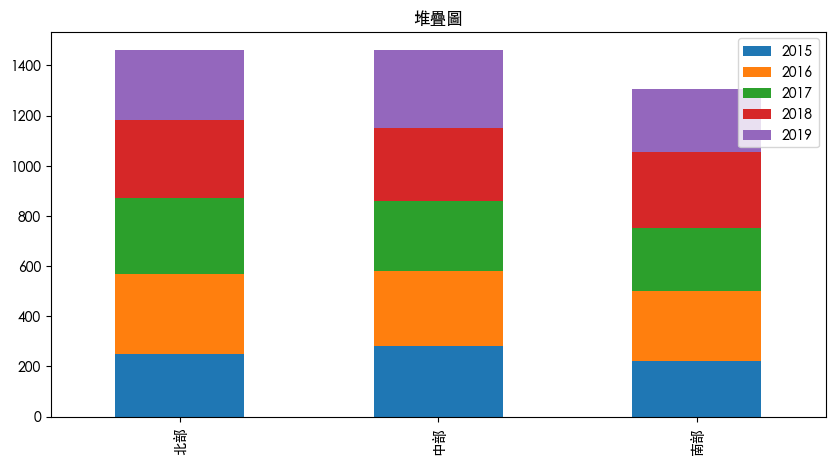

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
# 設定中文字型 Heiti TC
plt.rcParams['font.sans-serif']=['Heiti TC']
df = pd.DataFrame([[250,320,300,312,280],
							[280,300,280,290,310],
							[220,280,250,305,250]],
							index=['北部','中部','南部'],
							columns=[2015,2016,2017,2018,2019])

# g1 = df.plot(kind='bar', title='長條圖', figsize=[10,5])
# g2 = df.plot(kind='barh', title='橫條圖', figsize=[10,5])
# g3 = df.plot(kind='bar', stacked=True, title='堆疊圖', figsize=[10,5])

## 繪製折線圖

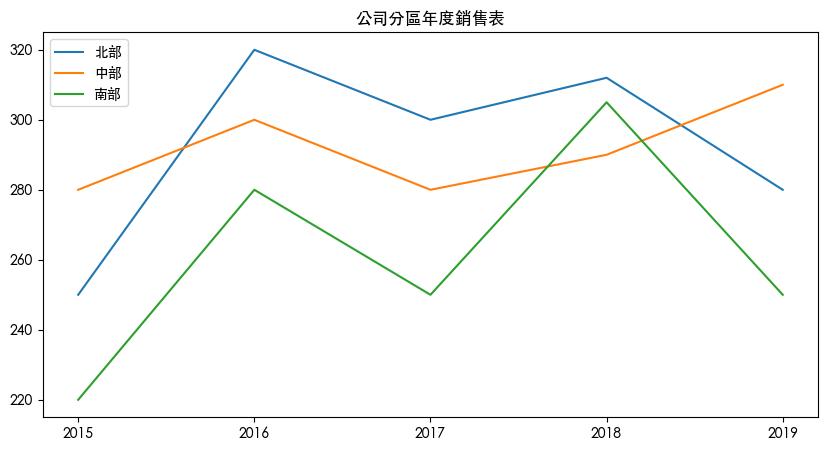

In [120]:
import pandas as pd
from matplotlib import pyplot as plt
# 設定中文字型 Heiti TC
plt.rcParams['font.sans-serif']=['Heiti TC']

df = pd.DataFrame([[250,320,300,312,280],
							[280,300,280,290,310],
							[220,280,250,305,250]],
							index=['北部','中部','南部'],
							columns=[2015,2016,2017,2018,2019])

g1 = df.iloc[0].plot(kind='line', legend=True,
							  xticks=range(2015,2020),
							  title='公司分區年度銷售表',
							  figsize=[10,5])
g1 = df.iloc[1].plot(kind='line',
							  legend=True,
							   xticks=range(2015,2020))
g1 = df.iloc[2].plot(kind='line',
									  legend=True,
									  xticks=range(2015,2020))

## 繪製圓餅圖

array([<Axes: ylabel='2015'>, <Axes: ylabel='2016'>,
       <Axes: ylabel='2017'>, <Axes: ylabel='2018'>,
       <Axes: ylabel='2019'>], dtype=object)

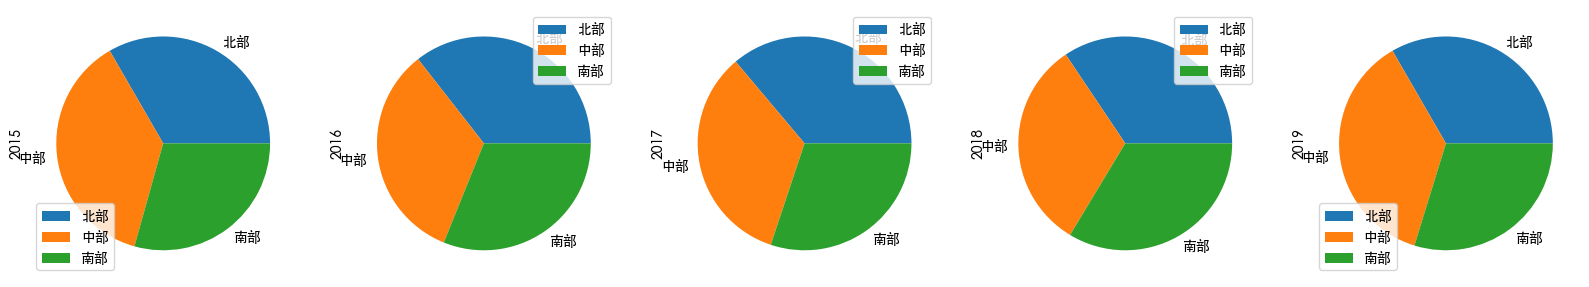

In [121]:
import pandas as pd
from matplotlib import pyplot as plt
# 設定中文字型 Heiti TC
plt.rcParams['font.sans-serif']=['Heiti TC']

df = pd.DataFrame([[250,320,300,312,280],
                   [280,300,280,290,310],
                   [220,280,250,305,250]],
                  index=['北部','中部','南部'],
                  columns=[2015,2016,2017,2018,2019])
df.plot(kind='pie', subplots=True, figsize=[20,20])